# AM 207, Pset 1
## Spencer Hallyburton
### Collaborator: Salvador Barragan

In [251]:
# Up-front things
import matplotlib.pyplot as plt
import numpy as np
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import stats
from scipy.stats import norm

font_val = 18
plt.rc('font', size=font_val)          # controls default text sizes
plt.rc('axes', titlesize=font_val)
plt.rc('axes', labelsize=font_val)    # fontsize of the x and y labels
plt.rc('legend', fontsize=(font_val-3))    # legend fontsize
plt.rc('font', family='Sans Serif')


# Problem 2: Part A - Computing MLE Parameter

In [3]:
# Problem 2, Part A:

# (2.A) Computing Sum
x = np.array([[0.5,2.5], [3.2,1.3], [2.72,5.84], [10.047,0.354]])
x = np.transpose(x)
sum_out = sum(map(lambda x:x*x, np.reshape(x,(-1,1))))
print('Sum of Squared Elements:', sum_out)
lam = 8/sum_out
print('Lambda Parameter:', lam)

Sum of Squared Elements: [ 161.001525]
Lambda Parameter: [ 0.04968897]


# Problem 2: Part B - Visualizing Data and Distribution

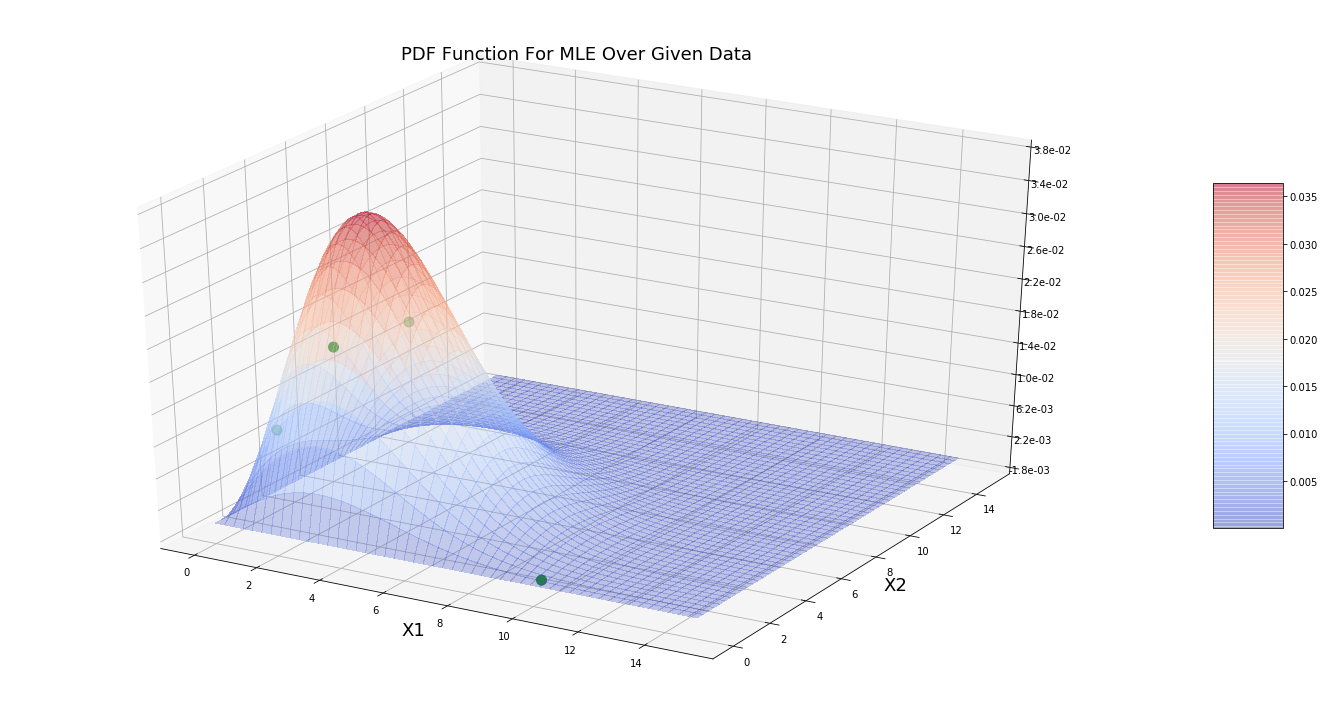

In [4]:
# Problem 2, Part B:
# (2.B) Visualizing Data and Distribution

# Function for PDF
def PDF_func(x):
    return 4*lam**2*x[0]*x[1]*np.exp(-lam*(x[0]**2 + x[1]**2 ))

xspec = PDF_func(x)

# Mesh Grid Space
X1 = np.arange(0, 15, 0.05)
X2 = np.arange(0, 15, 0.05)
X1, X2 = np.meshgrid(X1, X2)
Z = PDF_func([X1,X2])

# Plot in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

# Plot Surface
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=.3, label='PDF')
# Add Points in Green:
ax.scatter(x[0,:], x[1,:], PDF_func(x), s=100, c='g', label='Given Data')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(11))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))

# Color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add titles and labels
ax.set_title('PDF Function For MLE Over Given Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

# Problem 3: Part A - Visualization of Data and Distribution

### (3.A.1) 2-D Visualization of the Distribution of Data


Data Shape: (10000, 2)
Mean Along Each Dimension: [ 3.99276398  4.99814632]
Variance Along Each Dimension: [ 0.48564757  0.50525708]


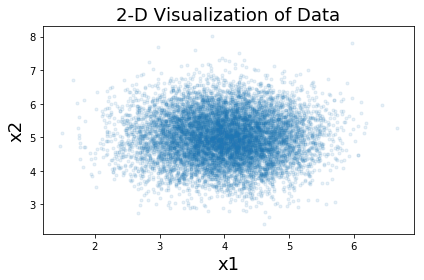

In [5]:
# Problem 3, Part A:
# Load in the data
data = np.genfromtxt(r'Homework_1_Data.txt', delimiter=',')
print('Data Shape:', np.shape(data))
print('Mean Along Each Dimension:', np.mean(data, axis=0))
print('Variance Along Each Dimension:', np.var(data, axis=0))

# (3.A.1) 2-D Visualization of the Distribution of Data
plt.scatter(data[:,0], data[:,1], marker='.', alpha=.1)
plt.title('2-D Visualization of Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

### (3.A.2) Visualize the PDF of the distribution of data


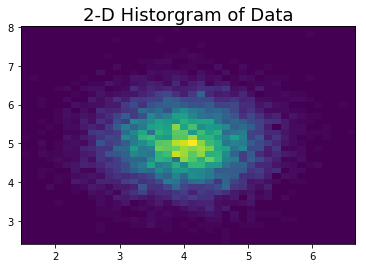

In [6]:
# (3.A.2) Visualize the PDF of the distribution of data
# 2-D Histogram
plt.hist2d(data[:,0], data[:,1], bins = 40)
plt.title('2-D Historgram of Data')
plt.show()

Given the 2-dimensional histogram of the data, we observe that this data is most likely a 2-dimensional normal distribution, given that there is a concentration of points near the mean of each dimension of the data and there is some degree of symmetric about a minor and major axis of oval rings. The general form of this kind of normal distribution is:

$$f(x,y) = A \exp\left(- \left(\frac{(x-\bar{x})^2}{2\sigma_x^2} + \frac{(y-\bar{y})^2}{2\sigma_y^2} \right)\right)$$

Citation: https://en.wikipedia.org/wiki/Gaussian_function#Two-dimensional_Gaussian_function

We can visualize the coefficient, $A$, as the height of the peak at the mean value of the gaussian. To determine this value, we can apply the normalization condition for the volume under the Gaussian:

The volume under the Gaussian function is given by
$$V = 1 = \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y)\,dx \,dy=2 \pi A \sigma_x \sigma_y$$


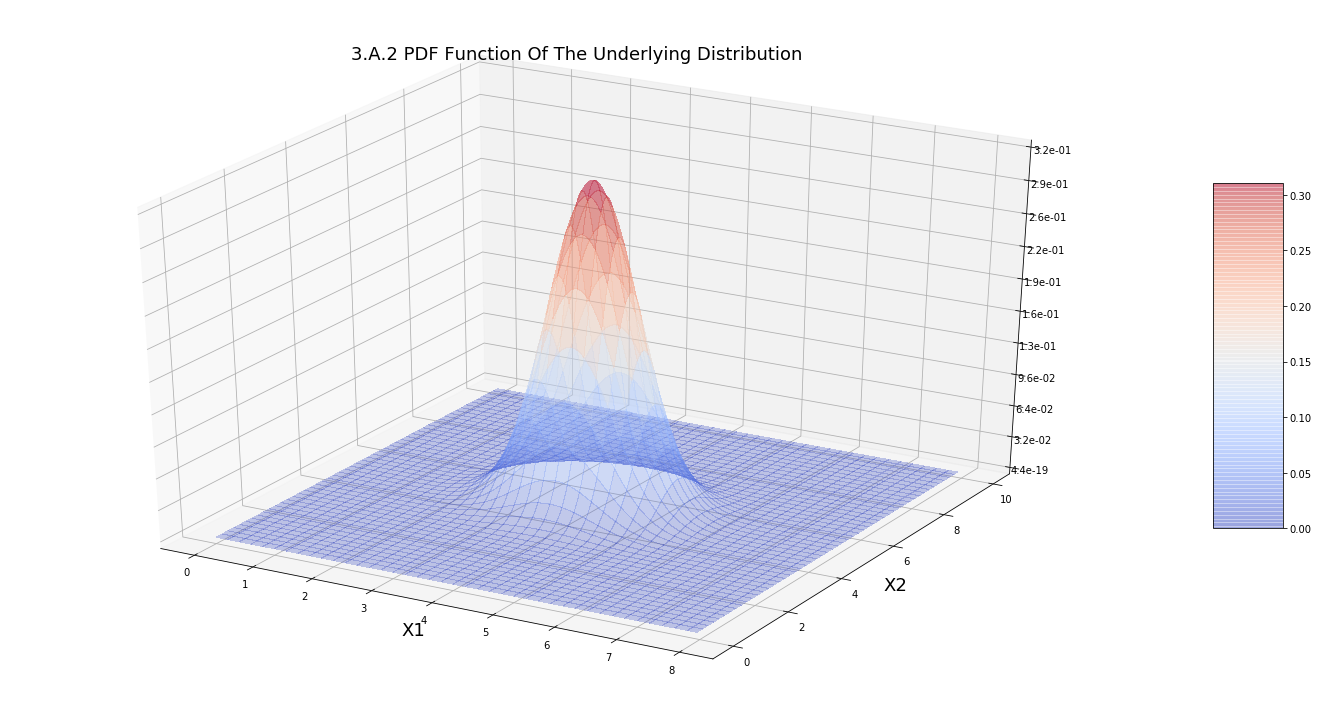

In [225]:
# Get the coefficient, A:
sigx = np.std(data, axis=0)[0]
sigy = np.std(data, axis=0)[1]
######################################################

# Plot the 2-D Gaussian Function:
# Function for PDF
def PDF_func_2(x, mu, sig):
    A = 1/(2*np.pi*sigx*sigy)
    return A*np.exp(-(x[0]-mu[0])**2/(2*sig[0]**2) + -(x[1]-mu[1])**2/(2*sig[1]**2) )

# xspec = PDF_func_2(np.transpose(data), np.mean(data, axis=0), np.std(data, axis=0))

# Mesh Grid Space
X1_3 = np.arange(0, 8, 0.05)
X2_3 = np.arange(0, 10, 0.05)
X1_3, X2_3 = np.meshgrid(X1_3, X2_3)
Z_3 = PDF_func_2([X1_3,X2_3], np.mean(data, axis=0), np.std(data, axis=0))

# Plot in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

# Plot Surface
surf = ax.plot_surface(X1_3, X2_3, Z_3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=.3, label='PDF')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(11))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))

# Color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add titles and labels
ax.set_title('3.A.2 PDF Function Of The Underlying Distribution')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

### (3.A.3) Distribution defined by fx2|x1 for x1 contained in some range
To find the conditional distribution of x2 given x1, we can select data points where values of x1 are contained in a small sliver and compute the distribution of the remaining points along x2

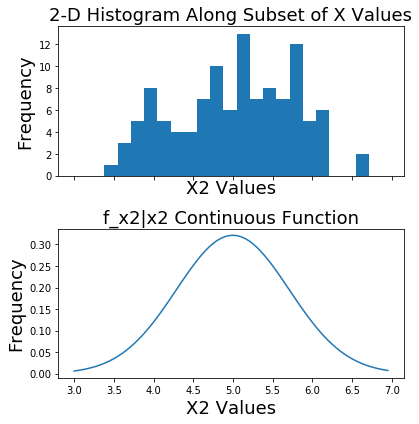

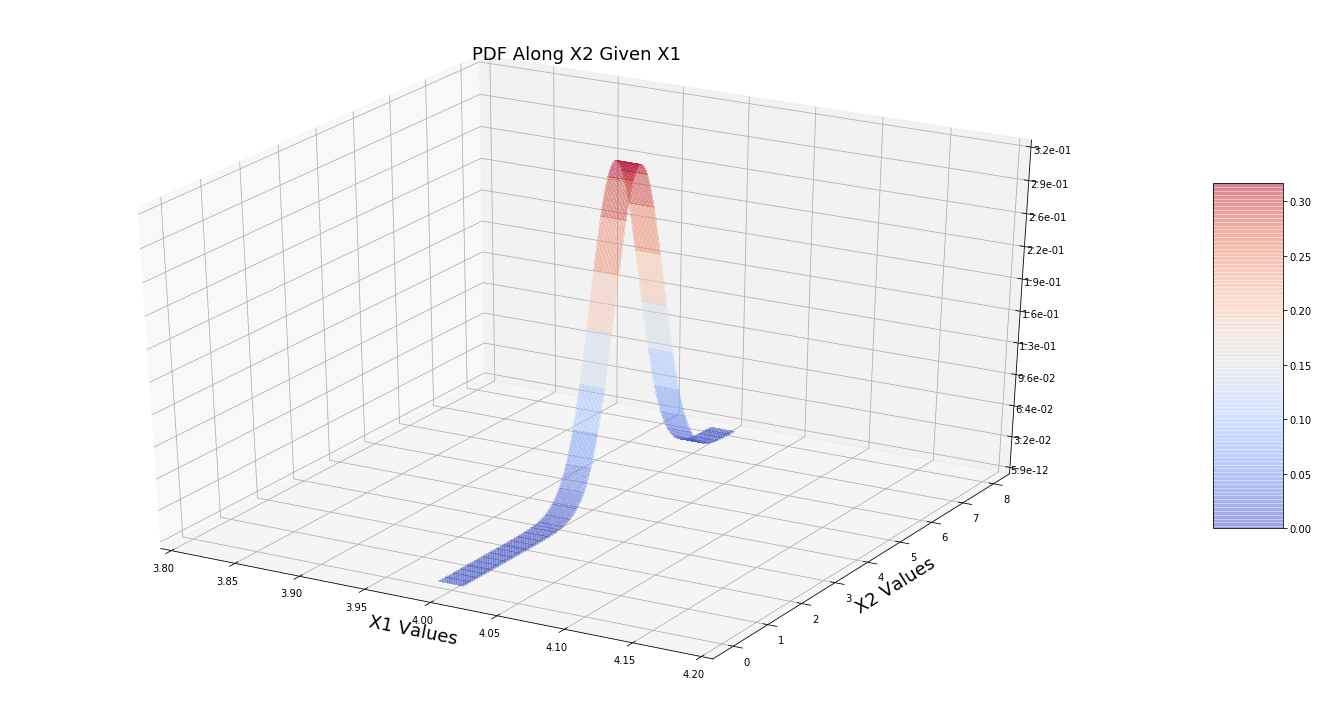

In [247]:
# (3.A.3) Distribution defined by fx2|x1 for x1 contained in some range
# Get all points where x1 is in a certain range:
xr = [3.99, 4.01]
data_range_X = data[(data[:,0]>xr[0]) & (data[:,0]<xr[1]), :]

# Plot Histogram
fig, ax = plt.subplots(2,1,figsize=(6,6),sharex=True)
ax[0].hist(data_range_X[:,1], bins = 20)
ax[0].set_title('2-D Histogram Along Subset of X Values')
ax[0].set_xlabel('X2 Values')
ax[0].set_ylabel('Frequency')
x2 = np.arange(3,7,.05)
ax[1].plot(x2, PDF_func_2([4.00, x2], np.mean(data, axis=0), np.std(data, axis=0)))
ax[1].set_xlabel('X2 Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('f_x2|x2 Continuous Function')
plt.tight_layout()
plt.show()

# Plot Disribution where X1 is at X==4
X2_3_2 = np.arange(0, 8, 0.05)
X1_3_2 = np.arange(3.99, 4.01, 0.001)
X1_3_2, X2_3_2 = np.meshgrid(X1_3_2, X2_3_2)
Z_3_2 = PDF_func_2([X1_3_2,X2_3_2], np.mean(data, axis=0), np.std(data, axis=0))

# Plot in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

# Plot Surface
surf = ax.plot_surface(X1_3_2, X2_3_2, Z_3_2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=.3, label='PDF')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(11))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))

# Color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X1 Values')
ax.set_ylabel('X2 Values')
ax.set_title('PDF Along X2 Given X1')
ax.set_xlim([3.8,4.2])
plt.tight_layout()
plt.show()

### (3.A.4) Distribution defined by fx1
To find the distribution of x1, we can simply run the gaussian distribution along x1. Below we show the histogram and a normalized Gaussian function for fx1

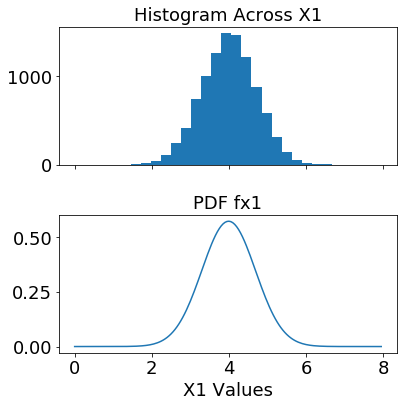

In [255]:
# (3.A.4) Distribution Defined by fx1
x1 = np.arange(0,8,.05)
fig, ax = plt.subplots(2,1,figsize=(6,6),sharex=True)
ax[0].hist(data[:,0], bins=20)
ax[0].set_title('Histogram Across X1')
ax[1].plot(x1, norm.pdf(x1,np.mean(data[:,0]), np.std(data[:,0])))
ax[1].set_title('PDF fx1')
ax[1].set_xlabel('X1 Values')

plt.tight_layout()
plt.show()

# Problem 3: Part B - Bootstrapping
In this section, we will run a non-parametric bootstrap function to estimate certain parameters

In [156]:
# Bootstrapping Algorithm
def get_bootstrap_sample(data,nlen):
    randrow = np.random.choice(range(np.size(data,axis=0)), nlen, replace=True)
    if len(data.shape)==1:
        bootstrap_sample = data[randrow]
    else:
        bootstrap_sample = data[randrow,:]
    return(bootstrap_sample)

def perform_bootstrap(data,nlen,ntrials,func):
    if len(data.shape)==1:
        output = np.zeros(ntrials)
        for i in range(ntrials):
            sample = get_bootstrap_sample(data,nlen)
            output[i] = func(sample, axis=0)
    else:
        cols = np.size(data,1)
        output = np.zeros((ntrials, cols))
        for i in range(ntrials):
            sample = get_bootstrap_sample(data,nlen)
            output[i,:] = func(sample, axis=0)
            
    return(output)

In [157]:
# Compute the Actual Parameters:
print('Data Shape:', np.shape(data))
print('Mean Along Each Dimension:', np.mean(data, axis=0))
print('Variance Along Each Dimension:', np.var(data, axis=0))

# Try the mean:
nsize = 1000
ntrials = 1000
mean_boot = perform_bootstrap(data, nsize, ntrials, np.mean)
std_boot = perform_bootstrap(data_range_X, nsize, ntrials, np.std)

Data Shape: (10000, 2)
Mean Along Each Dimension: [ 3.99276398  4.99814632]
Variance Along Each Dimension: [ 0.48564757  0.50525708]


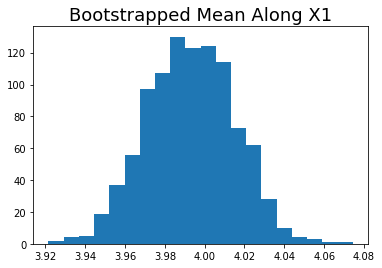

Empirical Estimation of Mean X1: 3.9929
Mean of Original Data Set X1: 3.9928
Standard Error of the Mean X1: 0.0221


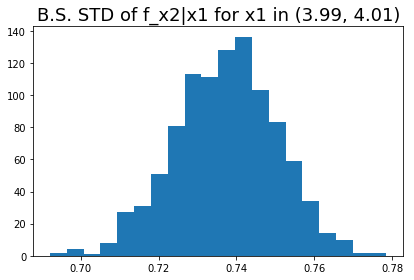

Empirical Estimation of STD f_x2|x1: 0.7374
STD of f_x2_x1 from original: 0.7310
Standard Error of STD Estimation: 0.0131


In [158]:
#plot the distribution
b = 20
# Mean
fig, ax = plt.subplots()
ax.hist(mean_boot[:,0], bins=b)
ax.set_title('Bootstrapped Mean Along X1')
plt.show()

print('Empirical Estimation of Mean X1: %.4f' % np.mean(mean_boot, axis=0)[0])
print('Mean of Original Data Set X1: %.4f' % np.mean(data, axis=0)[0])
print('Standard Error of the Mean X1: %.4f' % np.std(mean_boot, axis=0)[0])

# Standard Deviation
fig, ax = plt.subplots()
ax.hist(std_boot[:,1], bins=b)
ax.set_title('B.S. STD of f_x2|x1 for x1 in (3.99, 4.01)')
plt.tight_layout()
plt.show()

print('Empirical Estimation of STD f_x2|x1: %.4f' % np.mean(std_boot[:,1]))
print('STD of f_x2_x1 from original: %.4f' % np.std(data_range_X))
print('Standard Error of STD Estimation: %.4f' % np.std(std_boot[:,1]))

The above plots from the bootstrapping algorithm give us a sampling distribution of the mean and standard deviation along each component. From these plots, we can empirically estimate the mean by taking the mean of the sampling distribution. We can similarly estimate the standard deviation by taking the mean of the standard deviation sampling distribution.

### 3.B.3: Significant Digist of Standard Deviation Estimate
## TO DO

# Problem 4: Missing Data

In [126]:
# (4) Missing Data
import pandas as pd
wine_data = pd.read_csv('wine_quality_missing.csv')
print('Original Shape (Rows x Columns):', wine_data.shape)
wine_data.head()

Original Shape (Rows x Columns): (178, 14)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,NaN,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,NaN,4.32,1.04,2.93,735.0,1


In [213]:
wine_data = pd.read_csv('wine_quality_missing.csv')

# Show which columnas have at least one NaN entry at the beginning
NaNcols0 = wine_data.isnull().any(axis=0)
print('ORIGINAL:')
print('Columns that have at least one NaN entry:', np.sum(NaNcols0))

# (4.1) Drop Imputation
print('\nDROP IMPUTATION:')
wine_DropImp = wine_data[wine_data.notnull().all(axis=1)]
print('Shape With Drop Imputation (Rows x Columns):', wine_DropImp.shape)
NaNcols1 = wine_DropImp.isnull().any(axis=0)
print('Columns that have at least one NaN entry:', np.sum(NaNcols1))

# (4.2) Mean Imputation
print('\nMEAN IMPUTATION:')
wine_MeanImp = wine_data
for colname in wine_MeanImp.columns:
    NaNlocs = wine_MeanImp[colname].isnull()
    MEAN = np.mean(wine_MeanImp[colname])
    wine_MeanImp.loc[NaNlocs,colname] = MEAN

NaNcols2 = wine_MeanImp.isnull().any(axis=0)
print('Shape With Mean Imputation (Rows x Columns):', wine_MeanImp.shape)
print('Columns that have at least one NaN entry:', np.sum(NaNcols2), '\n')
wine_MeanImp.head()

ORIGINAL:
Columns that have at least one NaN entry: 13

DROP IMPUTATION:
Shape With Drop Imputation (Rows x Columns): (43, 14)
Columns that have at least one NaN entry: 0

MEAN IMPUTATION:
Shape With Mean Imputation (Rows x Columns): (178, 14)
Columns that have at least one NaN entry: 0 



,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.290000,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,19.508861,100.0,2.65,2.76,0.26,1.280000,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.810000,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,19.508861,113.0,3.85,3.49,0.24,2.180000,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.596211,4.32,1.04,2.93,735.0,1.0


In [222]:
# (4.3) Empirical Estimation of PDF using bootstrap
nsize = 50
ntrials = 500

# Drop Imp
mean_boot_drop = perform_bootstrap(wine_DropImp['Ash'], nsize, ntrials, np.mean)
mean_boot_mean = perform_bootstrap(wine_MeanImp['Ash'], nsize, ntrials, np.mean)

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


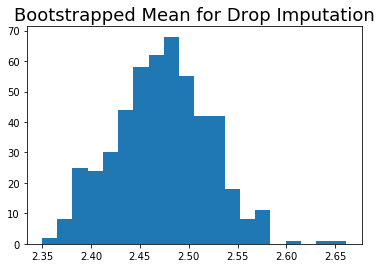

Drop Imputation - Estimation of Mean: 2.4730
Mean of Original Drop Imp Set: 2.3698

Standard Error of the Mean: 0.0480


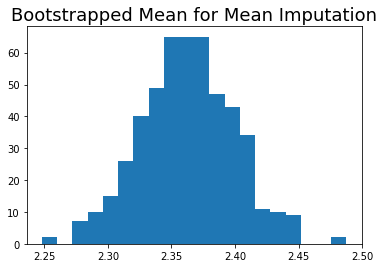

Mean Imputation - Estimation of Mean: 2.3626
Mean of Original Mean Imp Set: 2.3662

Standard Error of the Mean: 0.0368


In [223]:
b = 20
# Mean
fig, ax = plt.subplots()
ax.hist(mean_boot_drop, bins=b)
ax.set_title('Bootstrapped Mean for Drop Imputation')
plt.show()

print('Drop Imputation - Estimation of Mean: %.4f' % np.mean(mean_boot_drop))
print('Mean of Original Drop Imp Set: %.4f' % wine_DropImp['Ash'].mean())
print('\nStandard Error of the Mean: %.4f' % np.std(mean_boot_drop))

# Mean
fig, ax = plt.subplots()
ax.hist(mean_boot_mean, bins=b)
ax.set_title('Bootstrapped Mean for Mean Imputation')
plt.show()

print('Mean Imputation - Estimation of Mean: %.4f' % np.mean(mean_boot_mean))
print('Mean of Original Mean Imp Set: %.4f' % wine_MeanImp['Ash'].mean())
print('\nStandard Error of the Mean: %.4f' % np.std(mean_boot_mean))

### (4.4) Comparing Standard Errors of the Mean for the two methods
By the definition of the drop imputation method, we remove all rows with missing values. This will leave us with less rows in total when compared to the mean imputation method where we replace missing values with the column mean. In particular, we see that the drop imputation methods leaves us with 43 rows, whereas the mean imputation method maintains the 178 rows of the original dataset.

We notice that the mean imputation methods demonstrates less standard error of the mean than does the drop imputation method. By performing the mean imputation method, we have increased the likelihood that we will pick out the mean value when doing a random sample of the original data. This is because we have increased the number of times the mean value occurs in the list of data.